# Requesting a GPU
The GPU will be used for its CUDA cores in processing.

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Introduction to Natural Language Processing
## PrismAI | Applaudo Studios
### Presented by Rodrigo Morales, Machine Learning Engineer

This notebook was created for parts I and II for the PrismAI ML Huddle at Applaudo Studios. The idea is to present basic concepts of NLP in an interactive fashion. 

This notebook is diveded into sections:

### Session 01:
0. Setup
1. Exploring Spacy NLP framework
2. Word Vectors and NLU
3. spaCy NLP Pipelines
4. Rule-based NLP\
5. ML Models for NLP - based on word embeddings

### Session 02:
1. NLP pipelines from scratch
2. ML models for NLP
3. BERT and state-of-the-art ML for NLP
 

# Section 0 | Setup
In this section we will be downloading and setting up our environment to do NLP with spacy.

## Section 0.1 | Downloading Spacy and Pre-trained Models
We'll be downloading:
1. Spacy, of course
2. cuda113, for GPU processing
3. The English language small model (sm suffix)
4. The English language sort of BERT model using transformers (trf suffix)

In [ ]:
%%capture
!pip install pip setuptools wheel
!pip install spacy
!pip install 'spacy[cuda113]'
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_md
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
!pip install --upgrade spacy
!pip install spacy[transformers,cuda113]
!python -m spacy download es_dep_news_trf

## Section 0.2 | Imports Setup

In [ ]:
import spacy

# Section 1 | Exploring spaCy

In [ ]:
nlp = spacy.load('es_core_news_sm')

In [ ]:
with open ("wiki_slv.txt", "r") as f:
    text = f.read()

## Section 1.1 | The DOC object

In [ ]:
doc = nlp(text)

In [ ]:
print(text)

El Salvador (S.V.) (/ɛl ˈsælvədɔːr/ (audio speaker iconlisten); Spanish: [el salβaˈðoɾ] (audio speaker iconlisten), meaning "The Saviour"), officially the Republic of El Salvador (Spanish: República de El Salvador), is a country in Central America. It is bordered on the northeast by Honduras, on the northwest by Guatemala, and on the south by the Pacific Ocean. El Salvador's capital and largest city is San Salvador. The country's population in 2021 is estimated to be 6.8 million.[4]

Among the Mesoamerican nations that historically controlled the region are the Lenca[12] (after 600 AD),[13] the Mayans,[14] and then the Cuzcatlecs.[15] Archaeological monuments also suggest an early Olmec presence around the first millennium BC.[16] In the beginning of the 16th century, the Spanish Empire conquered the Central American territory, incorporating it into the Viceroyalty of New Spain ruled from Mexico City. However the Viceroyalty of Mexico had little to no influence in the daily affairs of 

In [ ]:
print(doc)

El Salvador (S.V.) (/ɛl ˈsælvədɔːr/ (audio speaker iconlisten); Spanish: [el salβaˈðoɾ] (audio speaker iconlisten), meaning "The Saviour"), officially the Republic of El Salvador (Spanish: República de El Salvador), is a country in Central America. It is bordered on the northeast by Honduras, on the northwest by Guatemala, and on the south by the Pacific Ocean. El Salvador's capital and largest city is San Salvador. The country's population in 2021 is estimated to be 6.8 million.[4]

Among the Mesoamerican nations that historically controlled the region are the Lenca[12] (after 600 AD),[13] the Mayans,[14] and then the Cuzcatlecs.[15] Archaeological monuments also suggest an early Olmec presence around the first millennium BC.[16] In the beginning of the 16th century, the Spanish Empire conquered the Central American territory, incorporating it into the Viceroyalty of New Spain ruled from Mexico City. However the Viceroyalty of Mexico had little to no influence in the daily affairs of 

What just happened? Seems that `text` y `doc` are identical, but are they? Let's do some more exploration.

In [ ]:
for token in text.split()[:10]:
    print (token)

El
Salvador
(S.V.)
(/ɛl
ˈsælvədɔːr/
(audio
speaker
iconlisten);
Spanish:
[el


In [ ]:
for token in doc[:10]:
    print (token)

El
Salvador
(
S.V.
)
(
/ɛl
ˈsælvədɔːr/
(
audio


In [ ]:
print(len(text))
print(len(doc))

3509
627


In [ ]:
words = text.split()[:10]
i=5
for token in doc[i:8]:
    print (f"SpaCy Token {i}:\n{token}\nWord Split {i}:\n{words[i]}\n\n")
    i=i+1

SpaCy Token 5:
(
Word Split 5:
(audio


SpaCy Token 6:
/ɛl
Word Split 6:
speaker


SpaCy Token 7:
ˈsælvədɔːr/
Word Split 7:
iconlisten);




## Section 1.2 | Sentence Boundary Detection
"In NLP, sentence boundary detection, or SBD, is the identification of sentences in a text. Again, this may seem fairly easy to do with rules. One could use split(“.”), but in English we use the period to also denote abbreviation. You could, again, write rules to look for periods not proceeded by a lowercase word, but again, I ask the question, “why bother?”. We can use spaCy and in seconds have all sentences fully separated through SBD." -Dr. W.J.B. Mattingly

In [ ]:
for sent in doc.sents:
    print (sent)

El Salvador (S.V.) (/ɛl ˈsælvədɔːr/ (audio speaker iconlisten); Spanish: [el salβaˈðoɾ] (audio speaker iconlisten), meaning "The Saviour"), officially the Republic of El Salvador (Spanish: República de El Salvador), is a country in Central America.
It is bordered on the northeast by Honduras, on the northwest by Guatemala, and on the south by the Pacific Ocean.
El Salvador's capital and largest city is San Salvador.
The country's population in 2021 is estimated to be 6.8 million.[4]

Among the Mesoamerican nations that historically controlled the region are the Lenca[12] (after 600 AD),[13] the Mayans,[14] and then the Cuzcatlecs.[15] Archaeological monuments also suggest an early Olmec presence around the first millennium BC.[16] In the beginning of the 16th century, the Spanish Empire conquered the Central American territory, incorporating it into the Viceroyalty of New Spain ruled from Mexico City.
However the Viceroyalty of Mexico had little to no influence in the daily affairs of 

## Section 1.3 | Token Attributes
As we just discussed, tokens are individual linguistic elements in our text that have meaning within the spaCy NLP pipeline. 

These tokens have contain metadata that we can use for our analysis, some of these are:
* .text
* .head
* .left_edge
* .right_edge
* .ent_type_
* .iob_
* .lemma_
* .morph
* .pos_
* .dep_
* .lang_

So now, let's work with them.

In [ ]:
sent1 = list(doc.sents)[0]
for token in sent1[0:15]:
  print(token)

El
Salvador
(
S.V.
)
(
/ɛl
ˈsælvədɔːr/
(
audio
speaker
iconlisten
)
;
Spanish


In [ ]:
token1 = sent1[14]
print(token1.text)
print(token1.head)
print(token1.left_edge)
print(token1.right_edge)
print(token1.ent_type)
print(token1.pos_)
print(token1.lemma_)

Spanish
Salvador
;
]
7654241940133152407
PROPN
Spanish


## Section 1.4 | Visualizing NLP with spaCy

In [ ]:
from spacy import displacy
displacy.render(sent1, style="dep", jupyter=True)

## Section 1.5 | Named Entity Recognition

In [ ]:
for ent in doc.ents:
    print (ent.text, ent.label_)

El Salvador LOC
S.V. LOC
/ɛl ˈsælvədɔːr/ MISC
Spanish: MISC
The Saviour MISC
officially the Republic of El Salvador PER
Spanish: República de El Salvador MISC
It is bordered on the northeast by Honduras MISC
Salvador's capital and largest city is San Salvador. MISC
estimated to be 6.8 million.[4]

Among the Mesoamerican nations that historically controlled the region are the Lenca[12] MISC
after 600 AD),[13] the Mayans,[14] and then the Cuzcatlecs.[15 LOC
Archaeological monuments MISC
In the beginning of the 16th century MISC
the Spanish Empire MISC
the Central American territory ORG
the Viceroyalty of New Spain MISC
However the Viceroyalty of Mexico MISC
which was colonized in 1524 PER
In 1609 MISC
the area was declared the Captaincy General of Guatemala ORG
which included the territory that would MISC
El Salvador LOC
from Spain MISC
the First Mexican Empire MISC
joining the Federal Republic of Central America in 1823 MISC
When the federation dissolved in 1841 MISC
El Salvador LOC
sov

In [ ]:
nlp_mid_size_model = spacy.load('es_core_news_lg')
doc_mid_size_model = nlp_mid_size_model(text)
for ent in doc_mid_size_model.ents:
    print (ent.text, ent.label_)

In [ ]:
displacy.render(doc, style='ent', jupyter=True)

# Section 2 | Word Vectors and NLU

"The goal of word vectors is to achieve numerical understanding of language so that a computer can perform more complex tasks on that corpus. Let’s consider the example above. How do we get a computer to understand 2 and 6 are synonyms or mean something similar? One option you might be thinking is to simply give the computer a synonym dictionary. It can look up synonyms and then know what words mean. This approach, on the surface, makes perfect sense, but let’s explore that option and see why it cannot possibly work." - Dr. W.J.B. Mattingly

## Section 2.1 | Setup

In [ ]:
import numpy as np

In [ ]:
nlp_md = spacy.load('es_core_news_lg')

In [ ]:
doc_md = nlp_md(text)

## Section 2.2 | Word Vectors
Why do we need word vectors? Once a word vector model is trained, we can do similarity matches very quickly and very reliably. Let’s explore some vectors from our medium sized model

In [ ]:
sent1 = list(doc_md.sents)[0]
sent1.vector

array([-2.01822209e+00, -5.77295005e-01,  5.05780041e-01,  7.24029005e-01,
       -1.92169213e+00,  2.45886892e-01, -1.43293604e-01,  4.61091995e-01,
       -1.46608144e-01, -2.87328029e+00,  7.21605420e-01, -5.27787864e-01,
        4.19661179e-02, -1.24253106e+00, -1.32667947e+00,  4.34241414e-01,
       -7.91125417e-01,  1.51400280e+00, -2.34503651e+00, -5.59799016e-01,
       -1.50015503e-01, -2.09211841e-01, -3.26596349e-01,  1.24790466e+00,
       -1.72478110e-01,  4.95416731e-01,  1.36987674e+00,  1.74111009e+00,
       -1.56138718e-01, -3.14475656e-01,  4.84485775e-01, -1.72330648e-01,
        1.61493170e+00,  2.91334224e+00,  1.08326197e+00, -2.34083867e+00,
       -8.87088239e-01, -1.10419405e+00, -7.82510161e-01, -2.13792980e-01,
        1.59020591e+00, -1.17024827e+00, -5.10654226e-02, -6.92636311e-01,
       -4.90217030e-01,  1.35705662e+00,  1.53190506e+00,  1.23210490e+00,
       -8.78898621e-01,  1.32222080e+00,  4.27422643e-01, -3.07065129e-01,
       -1.74265826e+00, -

In [ ]:
your_input = input()

ms = nlp_md.vocab.vectors.most_similar(
    np.asarray([nlp_md.vocab.vectors[nlp_md.vocab.strings[your_input]]]), n=10)
words = [nlp_md.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)

carro
['paraco', 'bobcat']


## Section 2.3 | Applications of Word Vectors
Cool, cool, so we can get synomnyms. But what are some real applications? Well, we can compare symilarities between entire documents. This has business applications such as detecting plagiarism, dismissing excess or repetitive data in an investigation and making summaries.

Now is time to play big girls and boys! Buckle up. We are going to use the transformer model

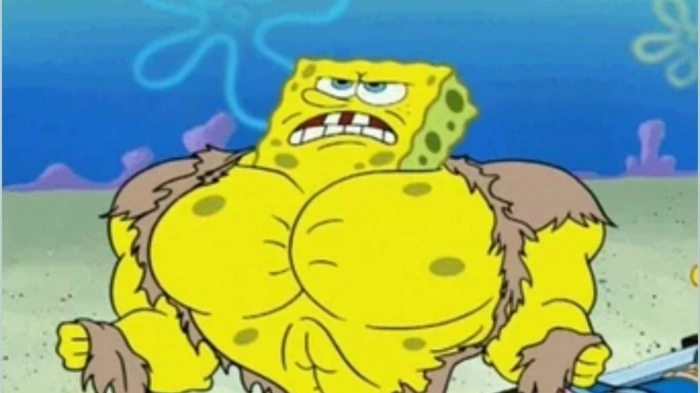

In [ ]:
nlp_trf = spacy.load('es_dep_news_trf')

In [ ]:
doc1 = nlp_md("Se me antoja una buena hamburguesa con papas fritas.")
doc2 = nlp_md("Las papas fritas de Lays son 99% aire y 1% producto. Puedes comerlas con limon y sal, o salsa de tomate.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))

Se me antoja una buena hamburguesa con papas fritas. <-> Las papas fritas de Lays son 99% aire y 1% producto. Puedes comerlas con limon y sal, o salsa de tomate. 0.2760891374140156


In [ ]:
doc3 = nlp_md("Trabajar en esta empresa (Applaudo Studios) ha sido una de las mejores experiencias de mi vida.")

# Similarity of two documents
print(doc1, "<->", doc3, doc3.similarity(doc1))

Se me antoja una buena hamburguesa con papas fritas. <-> Trabajar en esta empresa (Applaudo Studios) ha sido una de las mejores experiencias de mi vida. 0.04869940777113966


# Section 3 | spaCy NLP Pipelines

The hierarchy of spaCy
spacy_arc.svg

## Section 3.1 | spaCy NLP Pipelines
And the spacy NLP Pipeline Structure (default)
spacy_pipeline.svg

You can think of the spaCy pipeline like a factory. In a car factory pipeline first you receive individual pieces and the job of the pipeline is to create a complete car. Similarly, spaCy pipelines take in raw data which is tokenized, tagged, parsed, tagged with entities, lemmatized and so on. The final product of such pipeline is a Doc object.

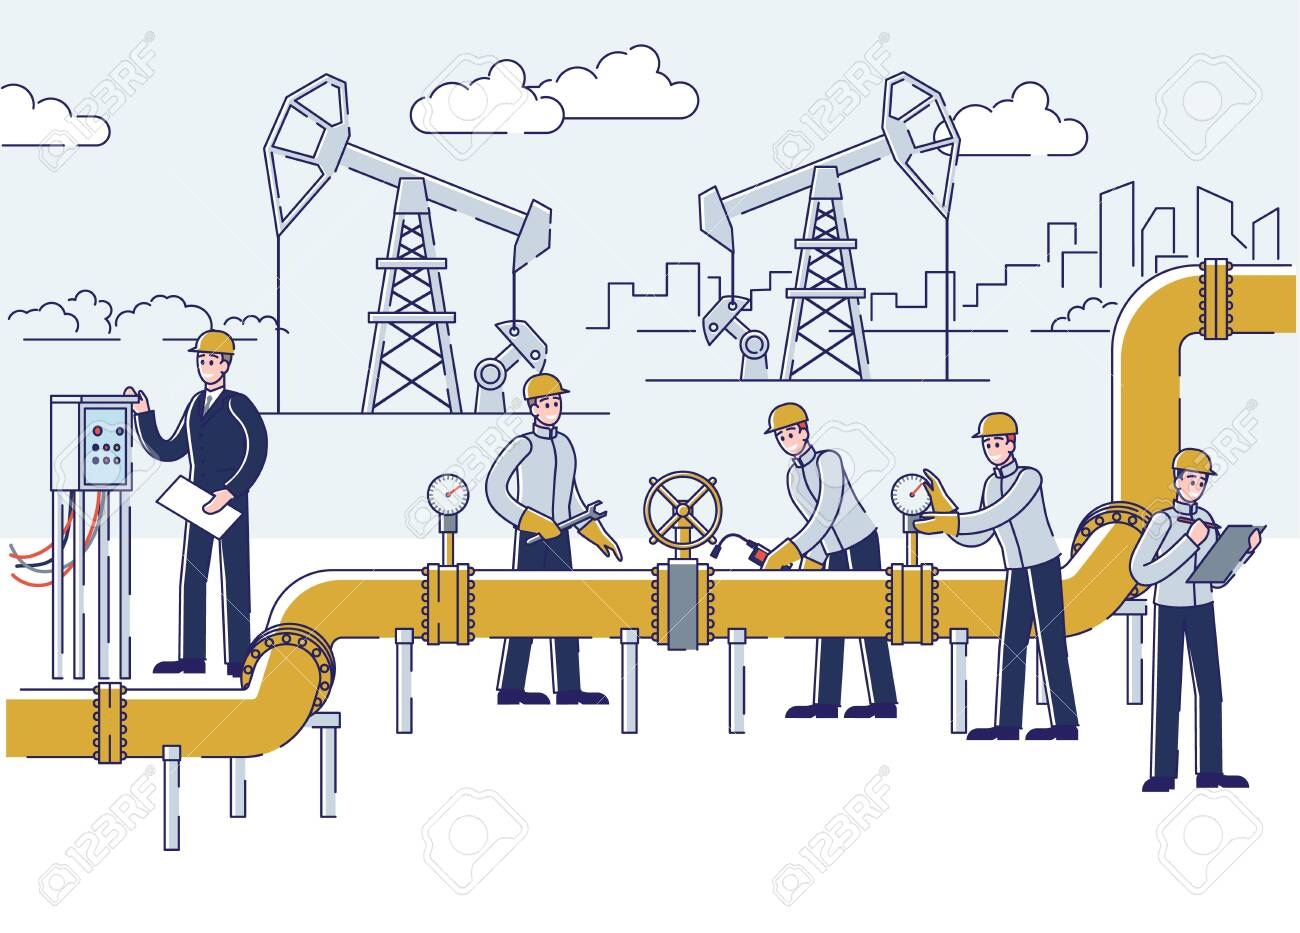


Some of the pipes you can add to the spaCy pipeline:

* Dependency Parser: A transition-based dependency parser component. The dependency parser jointly learns sentence segmentation and labelled dependency parsing, and can optionally learn to merge tokens that had been over-segmented by the tokenizer. 
* EntityLinker: component disambiguates textual mentions (tagged as named entities) to unique identifiers, grounding the named entities into the “real world”. 
* EntityRecognizer: A transition-based named entity recognition component. The entity recognizer identifies non-overlapping labelled spans of tokens. 
* EntityRuler: Specifically, the loss function optimizes for whole entity accuracy, so if your inter-annotator agreement on boundary tokens is low, the component will likely perform poorly on your problem.
* Lemmatizer: Component for assigning base forms to tokens using rules based on part-of-speech tags, or lookup tables. 
* Morpholog: pipeline component to predict morphological features and coarse-grained POS tags following the Universal Dependencies UPOS and FEATS annotation guidelines.
* SentenceRecognizer: Pipeline component for sentence segmentation
* Sentencizer: A simple pipeline component to allow custom sentence boundary detection logic that doesn’t require the dependency parse. 
* SpanCategorizer: consists of two parts: a suggester function that proposes candidate spans, which may or may not overlap, and a labeler model that predicts zero or more labels for each candidate.
* Tagger
* TextCategorizer: The text categorizer predicts categories over a whole document. and comes in two flavors: textcat and textcat_multilabel. When you need to predict exactly one true label per document, use the textcat which has mutually exclusive labels.
* Tok2Vec: Apply a “token-to-vector” model and set its outputs in the Doc.tensor attribute. This is mostly useful to share a single subnetwork between multiple components.
* Tokenizer: Segment text, and create Doc objects with the discovered segment boundaries.
* TrainablePipe: This class is a base class and not instantiated directly. 
* Transformer: This pipeline component lets you use transformer models in your pipeline. It supports all models that are available via the HuggingFace transformers library.

## Section 3.2 | Built-in Pipelines

In [ ]:
import requests
from bs4 import BeautifulSoup
s = requests.get("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")
soup = BeautifulSoup(s.content).text.replace("-\n", "").replace("\n", " ")
content = soup[:len(soup)//2]
content1 = content[:len(content)//2]
content2 = content[len(content)//2:]

In [ ]:
nlp_md = spacy.load('en_core_web_md')
nlp_md.max_length = 5278435

In [ ]:
doc_shaskespeare1 = nlp_md(content1)
doc_shaskespeare2 = nlp_md(content2)
doc_shaskespeare1.similarity(doc_shaskespeare2)

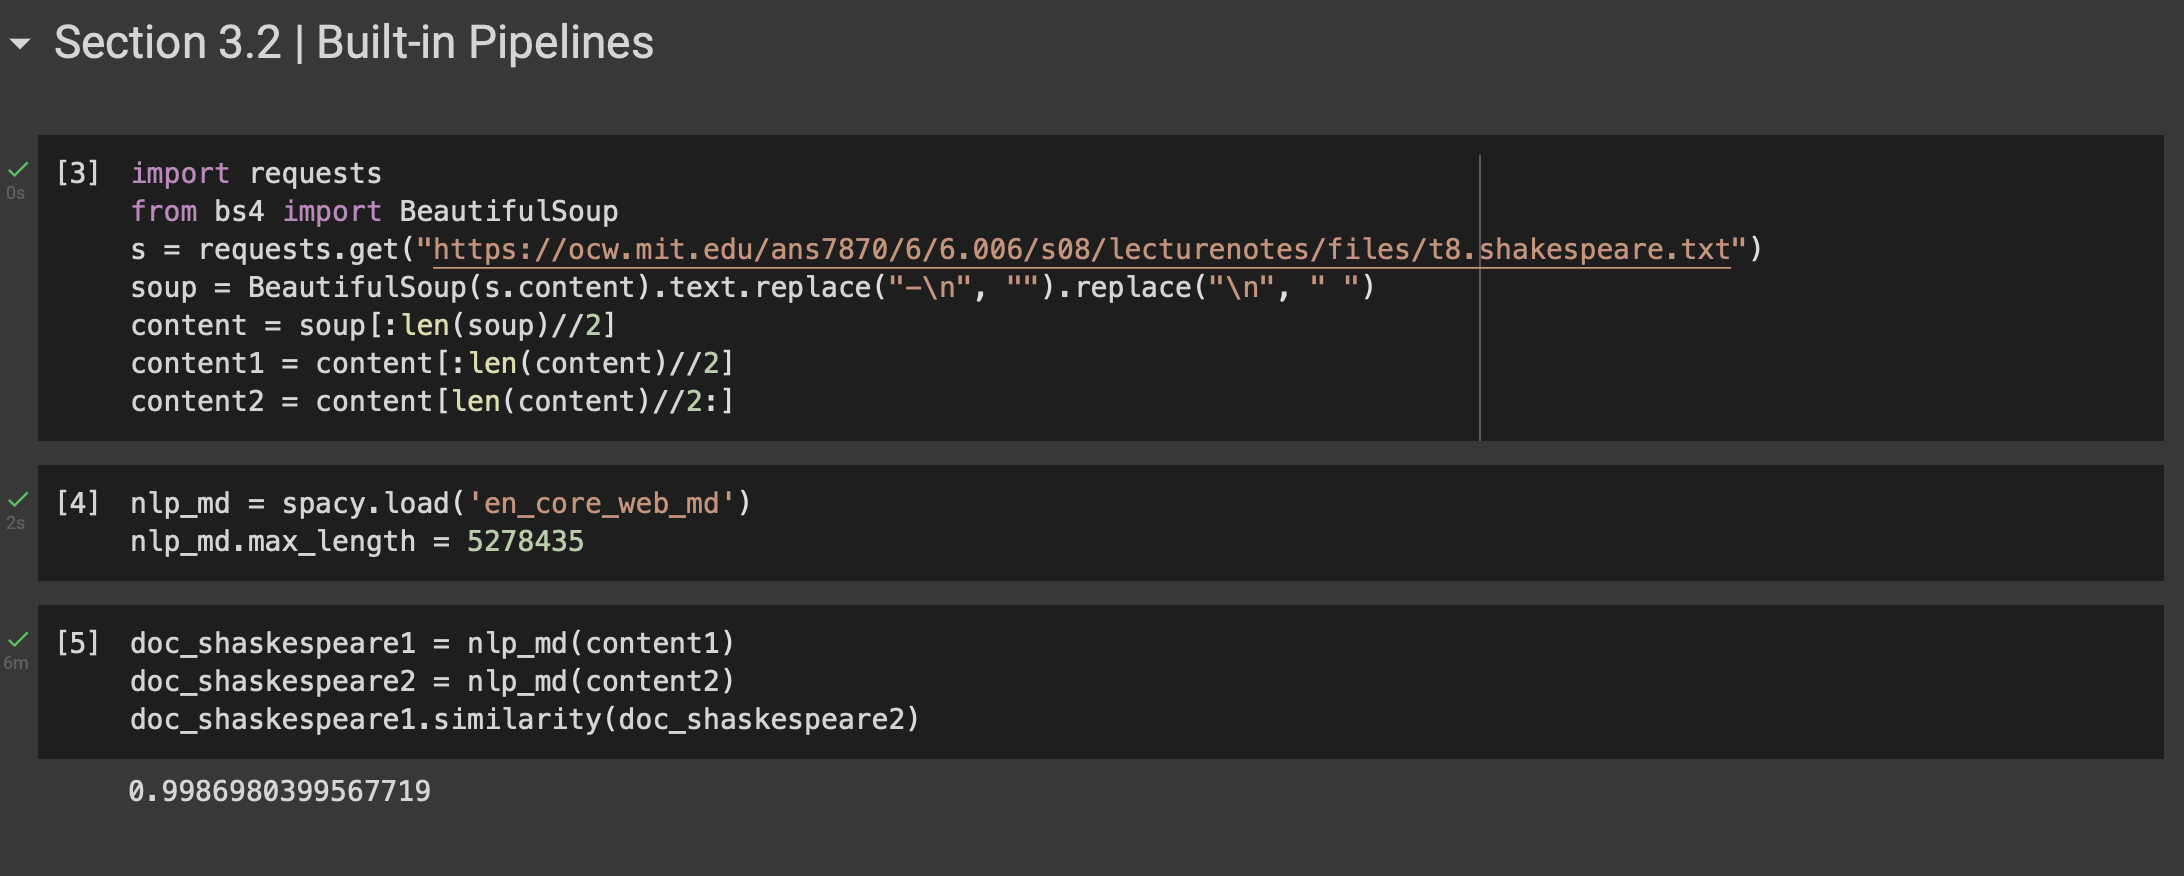

## Section 3.3 | Custom spaCy NLP Pipelines

In [ ]:
nlp_from_scratch = spacy.blank('en')
print("Components in our from scratch pipeline: ", nlp_from_scratch.components)
print("Pipeline analysis and breakdown: ",  nlp_from_scratch.analyze_pipes)

Components in our from scratch pipeline:  []
Pipeline analysis and breakdown:  <bound method Language.analyze_pipes of <spacy.lang.en.English object at 0x7f3720755090>>


In [ ]:
nlp_from_scratch.add_pipe("sentencizer")
print("Components in our from scratch pipeline: ", nlp_from_scratch.components)
print("Pipeline analysis and breakdown: ",  nlp_from_scratch.analyze_pipes)

Components in our from scratch pipeline:  [('sentencizer', <spacy.pipeline.sentencizer.Sentencizer object at 0x7f371faf4870>)]
Pipeline analysis and breakdown:  <bound method Language.analyze_pipes of <spacy.lang.en.English object at 0x7f3720755090>>


Comparing performance between built-in pipelines vs custom pipelines.

In [ ]:
%%time
doc_shaskespeare = nlp_md(content1[:len(content1)//2])
print(len(list(doc_shaskespeare.sents)))

11300
CPU times: user 56.7 s, sys: 309 ms, total: 57.1 s
Wall time: 56.9 s


In [ ]:
%%time
doc_shaskespeare = nlp_from_scratch(content1[:len(content1)//2])
print(len(list(doc_shaskespeare.sents)))

10780
CPU times: user 1.97 s, sys: 15 ms, total: 1.99 s
Wall time: 1.99 s


# Section 4 | Rule-based Natural Language Processing - Sentiment Analysis

## Section 4.1 | Reviewing Concepts

### **What is Sentiment Analysis?**
"Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations." - Shashank Gupta<br />

Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral.<br />

### **Intent Analysis**

Intent analysis steps up the game by analyzing the user’s intention behind a message and identifying whether it relates an opinion, news, marketing, complaint, suggestion, appreciation or query.

### **Contextual Semantic Search(CSS)**

Now this is where things get really interesting. To derive actionable insights, it is important to understand what aspect of the brand is a user discussing about. For example: Amazon would want to segregate messages that related to: late deliveries, billing issues, promotion related queries, product reviews etc. On the other hand, Starbucks would want to classify messages based on whether they relate to staff behavior, new coffee flavors, hygiene feedback, online orders, store name and location etc. But how can one do that?

We introduce an intelligent smart search algorithm called Contextual Semantic Search (a.k.a. CSS). The way CSS works is that it takes thousands of messages and a concept (like Price) as input and filters all the messages that closely match with the given concept. 


A conventional approach for filtering all Price related messages is to do a keyword search on Price and other closely related words like (pricing, charge, $, paid). This method however is not very effective as it is almost impossible to think of all the relevant keywords and their variants that represent a particular concept. CSS on the other hand just takes the name of the concept (Price) as input and filters all the contextually similar even where the obvious variants of the concept keyword are not mentioned.

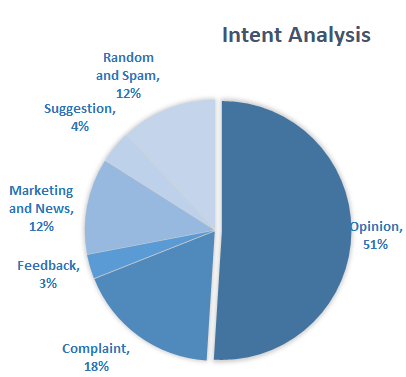

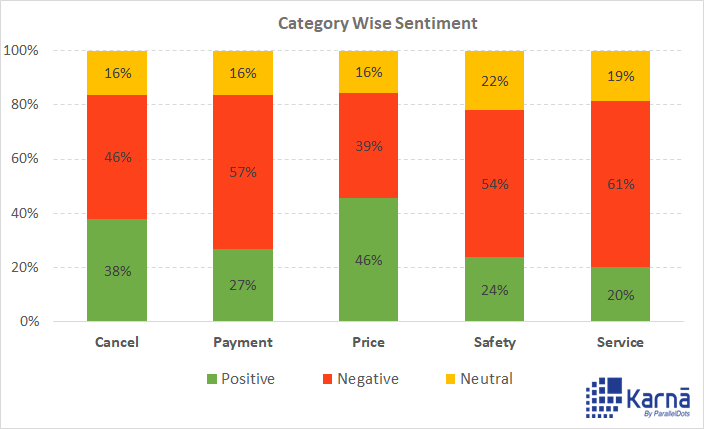

## Section 4.2 | Setup

In [ ]:
%%capture
!pip install vaderSentiment
!pip install textblob

In [ ]:
# Sentiment Analysis Libs
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Section 4.3 | Rule-based Sentiment Analysis (Sentiment Inference)

TextBlob is a Python (2 and 3) library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
print(TextBlob("I don't like your products, your customer service is terrible and my refund got delayer!").sentiment)
print(analyzer.polarity_scores("I don't like your products, your customer service is terrible and my refund got delayer!"))

Sentiment(polarity=-1.0, subjectivity=1.0)
{'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.6707}


In [ ]:
text = input('Give me some text to classify')

print(TextBlob(text).sentiment)
print(analyzer.polarity_scores(text))

Give me some text to classifyHola, no me gusta este frio.
Sentiment(polarity=0.0, subjectivity=0.0)
{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.296}


# Section 5 | Word Embedding based NLP Models

## Section 5.1 | Flair

What is **Flair**?

A powerful NLP library. Flair allows you to apply our state-of-the-art natural language processing (NLP) models to your text, such as named entity recognition (NER), part-of-speech tagging (PoS), special support for biomedical data, sense disambiguation and classification, with support for a rapidly growing number of languages.

A text embedding library. Flair has simple interfaces that allow you to use and combine different word and document embeddings, including our proposed Flair embeddings, BERT embeddings and ELMo embeddings.

A PyTorch NLP framework. Our framework builds directly on PyTorch, making it easy to train your own models and experiment with new approaches using Flair embeddings and classes.

## Section 5.2 | Setup

In [ ]:
%%capture
!pip install flair

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
classifier_en = TextClassifier.load('en-sentiment')

2022-04-06 20:57:27,710 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:
def infer_sentiment_flair(text: str, classifier: TextClassifier=classifier_en) -> str:
  sentence = Sentence(text)
  classifier.predict(sentence)

  return str(sentence.labels)

## Section 5.3 | Sentiment Analysis (Sentiment Infernce) using Word Embbedings and Word Vectors (kinda BERT)

In [ ]:
print(infer_sentiment_flair("I've loved working at Applaudo Studios! I feel like my professional and human development has skyrocketed since joining the AI team."))

['Sentence: "I 've loved working at Applaudo Studios ! I feel like my professional and human development has skyrocketed since joining the AI team ."'/'POSITIVE' (0.9849)]


# Section 6 | Bare Bones NLP with NLTK

## Section 6.1 | Setup

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
from nltk.tokenize import word_tokenize

## Section 6.2 | Tokenization and Stop Words Removal with NLTK

In [ ]:
example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


## Section 6.3 | Stemming and Lemmatization with NLTK

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.


There are mainly two errors in stemming – Overstemming and Understemming. Overstemming occurs when two words are stemmed to same root that are of different stems. Under-stemming occurs when two words are stemmed to same root that are not of different stems.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 
Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as the same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
 
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


# Section 7 | NLP and Machine Learning - Training our own Text Classifier!

The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language.

## Section 7.1 | Setup

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train = [
     ('I love this sandwich.', 'pos'),
     ('this is an amazing place!', 'pos'),
     ('I feel very good about these beers.', 'pos'),
     ('this is my best work.', 'pos'),
     ("what an awesome view", 'pos'),
     ('I do not like this restaurant', 'neg'),
     ('I am tired of this stuff.', 'neg'),
     ("I can't deal with this", 'neg'),
     ('he is my sworn enemy!', 'neg'),
     ('my boss is horrible.', 'neg')
]

test = [
     ('the beer was good.', 'pos'),
     ('I do not enjoy my job', 'neg'),
     ("I ain't feeling dandy today.", 'neg'),
     ("I feel amazing!", 'pos'),
     ('Gary is a friend of mine.', 'pos'),
     ("I can't believe I'm doing this.", 'neg')
]

## Section 7.2 | A Bit of Theory on Bayesian Text Classification

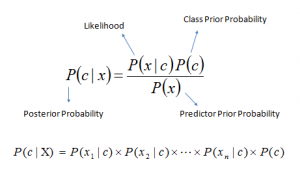

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

Bayes’ Theorem

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

 `P(A|B) = {P(B|A) P(A)}{P(B)}`

where A and B are events and P(B) ≠ 0.

Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
P(A) is the *priori* of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

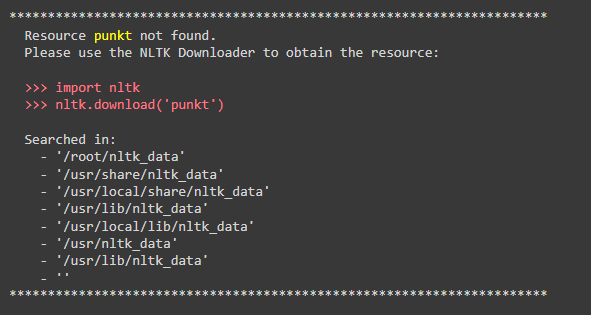

In [ ]:
cl.classify("it's pretty chivo")

'pos'

In [ ]:
cl.accuracy(test)

0.8333333333333334

In [ ]:
cl.classify("I do not like this place.")

'neg'

In [ ]:
cl.classify("This sandwich isn't too good")

'pos'

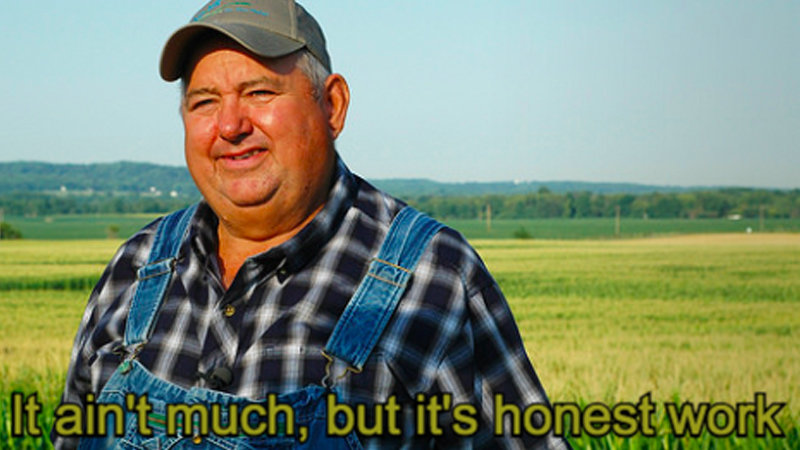

# Section 8 | State-of-the-art ML for NLP

## Section 8.1 | BERT Models

Bidirectional Encoder Representations from Transformer

In a nutshell, a transformer is an encoder-decoder architecture model which uses attention mechanisms to forward a more complete picture of the whole sequence to the decoder at once rather than sequentially as illustrated in the 
figures below.

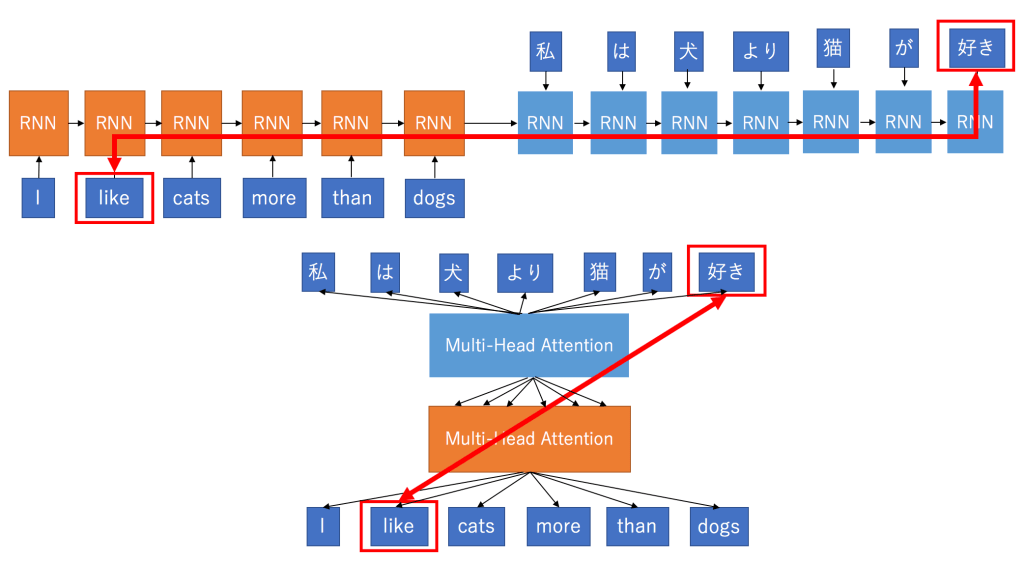

OpenAI’s GPT was the first to create a transformer based language model with fine tuning but to be more precise, it was only using the decoder of the transformer. Therefore, making the language modeling uni-directional.

Normally, BERT represents a general language modeling which supports transfer learning and fine-tuning on specific tasks

## Section 8.2 | Open AI's GPT 2

# Section 9 | Next Steps

Learn
1. Probability and Statistics
2. Vector and Matrix Algebra
3. Review linguistics